Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [3]:
# cell for imports. All imports must go here.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [4]:
df = pd.read_csv('./files/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

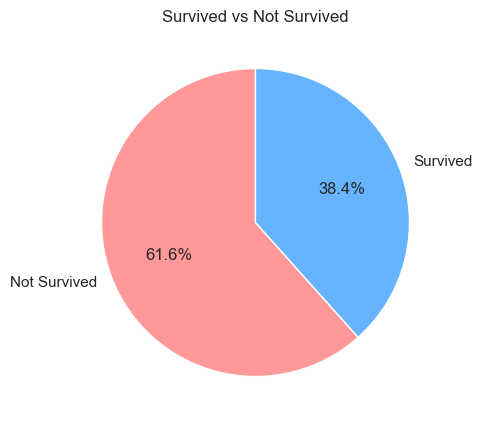

In [6]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 5))

plt.pie(df["Survived"].value_counts(), labels=["Not Survived", "Survived"], autopct='%1.1f%%', startangle=90, colors=["#ff9999","#66b3ff"])
plt.title("Survived vs Not Survived")

plt.show()

На графіку видно, що приблизно 2/3 пасажирів загинули, і лише 1/3 вижили.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


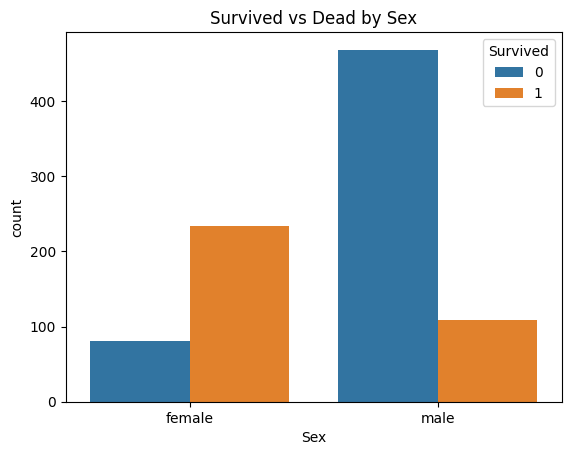

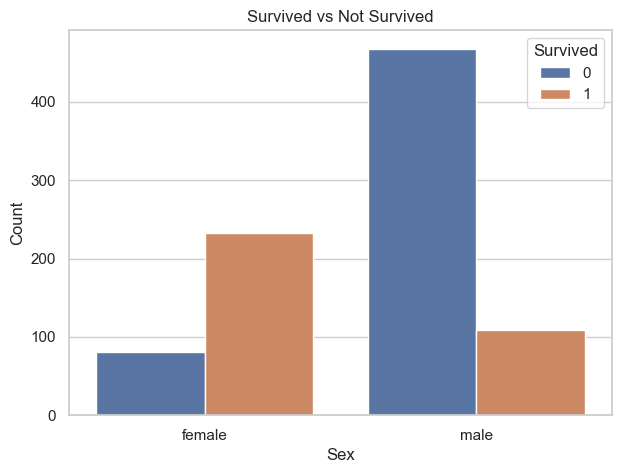

In [7]:
grouped_df = df.groupby(["Sex", "Survived"], as_index=False).size()

plt.figure(figsize=(7, 5))
sns.barplot(x="Sex", y="size", hue="Survived", data=grouped_df)

plt.title("Survived vs Not Survived")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

На графіку видно, що вдічі більше жінок вижило, у той час, як чоловіків загинуло приблизно у п'ять разів більше. Це скоріш за все пов'язано з тим, що пріоритет на порятунок при катастрофі надавався переважно жінкам та дітям.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

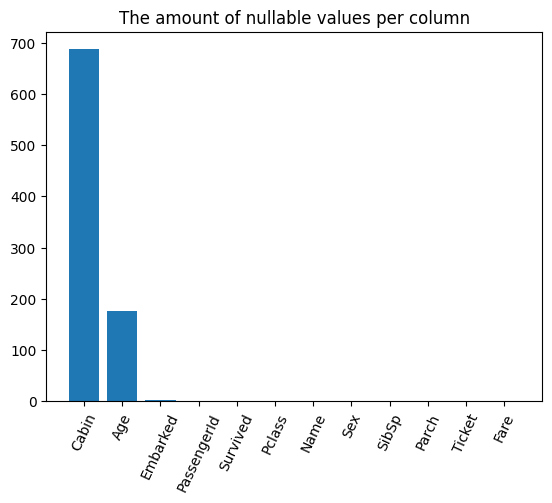

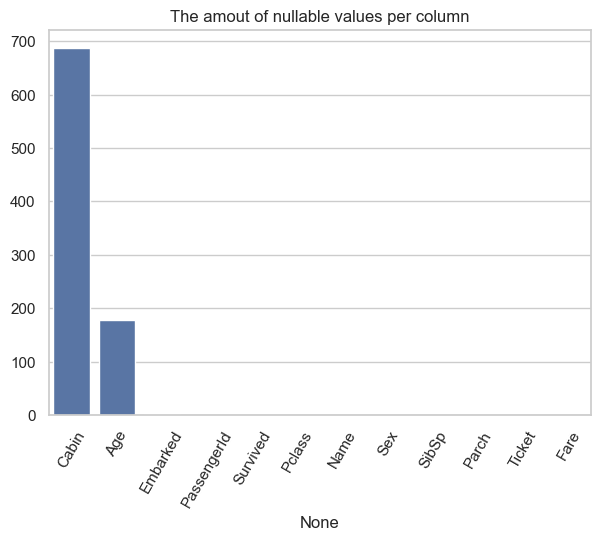

In [8]:
missing_values = df.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(x=missing_values.index, y=missing_values.values)

plt.xticks(rotation=60)
plt.title("The amout of nullable values per column")
plt.show()

Серед наявної інформації, нам невідома більшість даних стосовно кабін пасажирів, а також значна частина даних стосовно віку пасажирів. До того ж, відсутня невелика кількість інформації з колонки `embarked`. Але у той же час усі інші дані є відомими. Це може бути пов'язано з тим, що переважно пасажирів розсаджували хаотично, і ця інформація не була внесена у квиток. Щодо віку, то деякі пасажири могли або не знати свій точний вік, або не вказували його, або ж ця інформація була втрачена.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

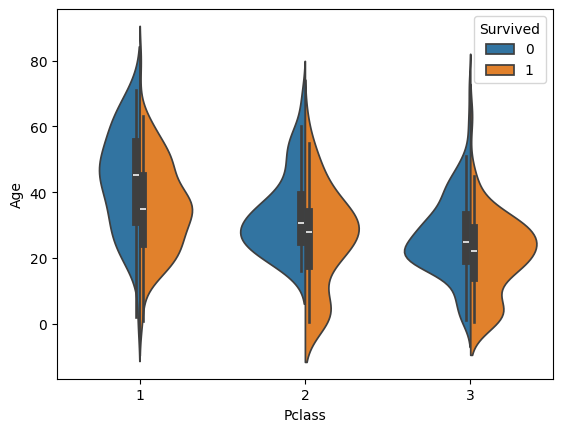

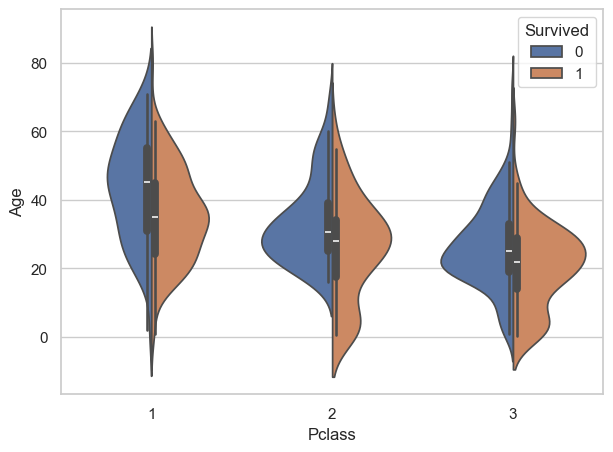

In [9]:
plt.figure(figsize=(7, 5))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True)

plt.show()

Даний тип графіку називається violin plot. Він дозволяє візуалізувати розподіл даних та їх густину. У даному випадку він дозволяє візуалізувати розподіл віку пасажирів в залежності від класу квитка та показати різницю в цих даних між вижившими та загиблими пасажирами. 

У першому класі, на відміну від двох інших, розподіл є відносно рівномірним, але можна побачити, що у молодших пасажирів було більше шансів вижити, і також загальна кількість виживших пасажирів здається більшою. У двох інших класах можна побачити, що є певний перевіс пасажирів середнього віку (20-40 років), набагато менша кількість пасажирів похилого віку. У другому класі кількість загиблих пасажирів переважає, у третьому - приблизно рівномірна. Також примітним є те, що в двох останніх класах набагато більша кількість виживших пасажирів молодшого віку, що є наслідком того, що вони були в першу чергу евакуйовані.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


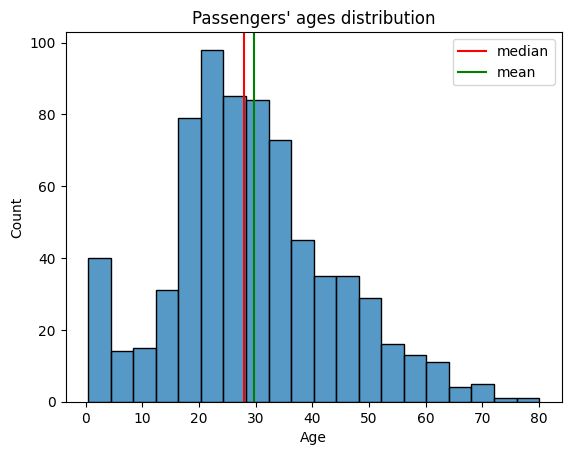

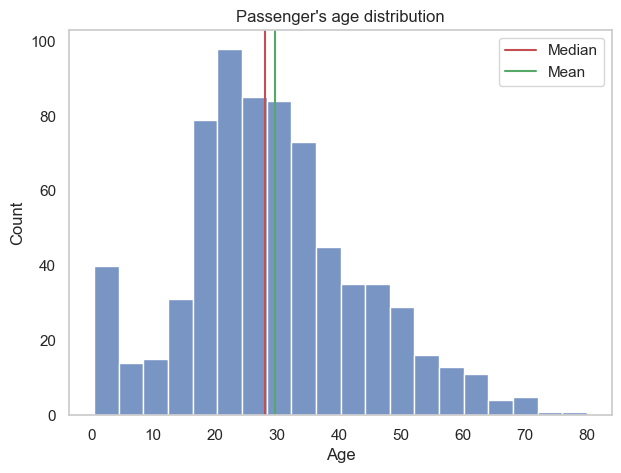

In [10]:
plt.figure(figsize=(7, 5))
sns.histplot(df["Age"])

plt.axvline(df["Age"].median(), color='r', label="Median")
plt.axvline(df["Age"].mean(), color='g', label="Mean")

plt.grid(None)

plt.legend()
plt.title("Passenger's age distribution")

plt.show()

З графіку можна побачити, що переважна кількість пасажирів були молодого і середнього віку від 20 до 40 років. Медіана і середнє значення віку пасажирів близькі до 30 років. Медіана є меншою через відносно велику кількість дітей на борту. 

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Одне з можливих бізнес-питань, яке ми могли б дослідити, полягає в тому, як соціально-економічний статус пасажира (представлений класом квитка) та стать впливають на рівень його виживання. Зокрема, ми можемо візуалізувати рівень виживання за статтю в межах кожного класу квитків

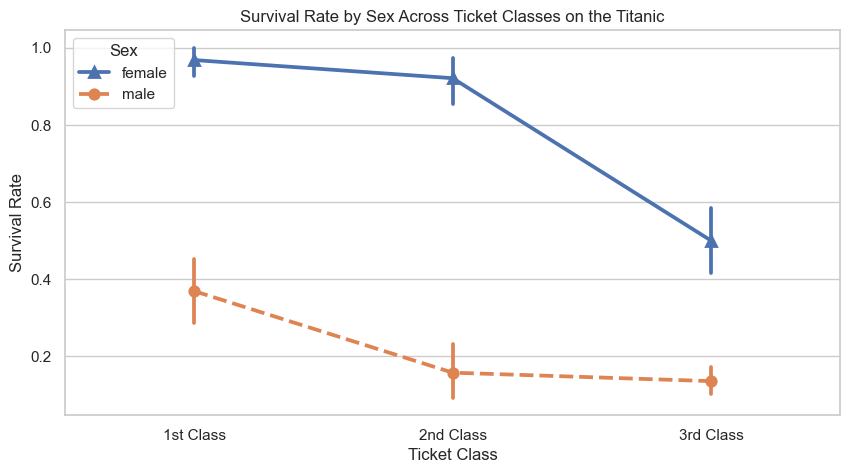

In [17]:
plt.figure(figsize=(10, 5))
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=df, palette='deep', markers=["^", "o"], linestyles=["-", "--"])

plt.title('Survival Rate by Sex Across Ticket Classes on the Titanic')
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.legend(title='Sex', loc='upper left')

plt.show()

З цього ми можемо зробити такі висновки:

- Жінки мали набагато вищий рівень виживання, ніж чоловіки, незалежно від класу квитка. Це пов'язано з тим, що жінкам надавали перевагу при евакуації.

- Пасажири першого класу мали найвищий рівень виживання, незалежно від статі. Це може бути пов'язано з тим, що пасажири першого класу мали кращий доступ до шлюпок.

- Серед жінок рівень виживання у першому та другому класі був однаково високим, у той час як серед жінок третього класу він впав майже до рівня чоловіків першого. У чоловіків рівень виживання у другому та третьому класі був однаково низьким, але в першому класі він був найвищим.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

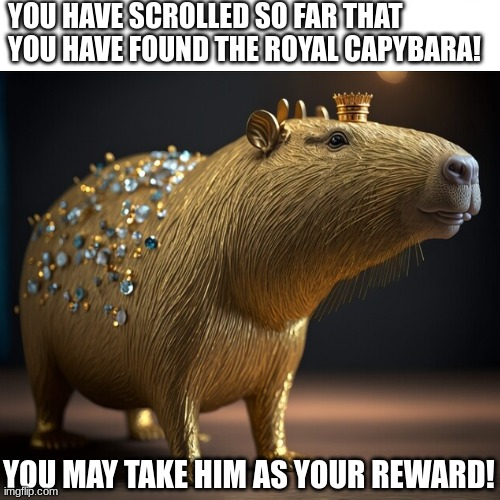